In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("RadNet_Laboratory_Analysis.csv")

In [3]:
df.dtypes

State             object
Location          object
Date Posted       object
Date Collected    object
Sample Type       object
Unit              object
Ba-140            object
Co-60             object
Cs-134            object
Cs-136            object
Cs-137            object
I-131             object
I-132             object
I-133             object
Te-129            object
Te-129m           object
Te-132            object
dtype: object

In [4]:
# 4. Create a list of numeric columns.

columns=df.columns
id_cols = ['State', 'Location', "Date Posted", 'Date Collected',
'Sample Type', 'Unit']
columns=list(set(columns)-set(id_cols))
columns

['Co-60',
 'Te-129',
 'I-131',
 'Ba-140',
 'Te-129m',
 'Cs-134',
 'Cs-136',
 'I-133',
 'I-132',
 'Te-132',
 'Cs-137']

In [5]:
# 5. Apply lambda function (or User Defined Function) for all numeric columns to apply NaN value

df.loc[:,columns]=df.loc[:,columns].applymap(lambda x: np.nan if
((x=="Non-detect")|(x=="ND")) else x)
df.loc[:,columns].head()

,Co-60,Te-129,I-131,Ba-140,Te-129m,Cs-134,Cs-136,I-133,I-132,Te-132,Cs-137
0,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.067,NaN,NaN,0.0057,NaN,NaN,NaN,0.0043,0.0074
3,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 6. Change datatypes to_datetime and to_numeric

df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])
for col in columns:
    df[col] = pd.to_numeric(df[col])
df.dtypes

State                     object
Location                  object
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type               object
Unit                      object
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [7]:
# 7. Use the astype method to transform the columns that are not numeric to the category type:

df['State'] = df['State'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Unit'] = df['Unit'].astype('category')
df['Sample Type'] = df['Sample Type'].astype('category')
df.dtypes

State                   category
Location                category
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type             category
Unit                    category
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [8]:
# Excercise 6. Aggregation and Grouping


In [11]:
# 1. Group the DataFrame using the State column.

df.groupby('State')

In [13]:
# 2. Select the radionuclide Cs-134 and calculate the average value per group:

df.groupby('State')['Cs-134'].mean().head()

State
AK     0.046191
AK          NaN
AL     5.600000
AR          NaN
AZ          NaN
Name: Cs-134, dtype: float64

In [15]:
# 3. Do the same for all columns, grouping per state and applying directly the mean function:

df.groupby('State').mean().head()

,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
State,,,,,,,,,,,
AK,NaN,NaN,0.046191,0.012,0.048533,0.310825,0.096625,NaN,0.12,0.061,0.104636
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,NaN,NaN,5.600000,NaN,0.001800,2.333000,NaN,NaN,NaN,NaN,0.009400
AR,NaN,NaN,NaN,NaN,NaN,19.766667,NaN,NaN,NaN,NaN,NaN
AZ,NaN,NaN,NaN,NaN,NaN,3.200000,NaN,NaN,NaN,NaN,NaN


In [17]:
# 4. Now, group by more than one column, using a list of grouping columns.

df.groupby(['State','Location']).mean()

Ba-140  Co-60  Cs-134  Cs-136  Cs-137  I-131  I-132  \
State Location                                                            
AK    Albany           NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Albany           NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Albuquerque      NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Anaheim          NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Ashland          NaN    NaN     NaN     NaN     NaN    NaN    NaN   
...                    ...    ...     ...     ...     ...    ...    ...   
WV    Welch/510        NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      West Chicago     NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Wichita          NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Wilmington       NaN    NaN     NaN     NaN     NaN    NaN    NaN   
      Yaphank          NaN    NaN     NaN     NaN     NaN    NaN    NaN   

                    I-133  Te-129  Te-129m  Te-132  
State Location                                      
AK    Albany          NaN     NaN      NaN     NaN  
      Albany          NaN     NaN      NaN     NaN  
      Albuquerque     NaN     NaN      NaN     NaN  
      Anaheim         NaN     NaN      NaN     NaN  
      Ashland         NaN     NaN      NaN     NaN  
...                   ...     ...      ...     ...  
WV    Welch/510       NaN     NaN      NaN     NaN  
      West Chicago    NaN     NaN      NaN     NaN  
      Wichita         NaN     NaN      NaN     NaN  
      Wilmington      NaN     NaN      NaN     NaN  
      Yaphank         NaN     NaN      NaN     NaN  

[7332 rows x 11 columns]

In [18]:
# 5. Aggregate using several aggregation operations per column with the agg method. Use the State
# and Location columns:

df.groupby(['State', 'Location']).agg({'Cs-134':['mean',
'std'],'Te-129':['min', 'max']})

Cs-134     Te-129    
                     mean std    min max
State Location                          
AK    Albany          NaN NaN    NaN NaN
      Albany          NaN NaN    NaN NaN
      Albuquerque     NaN NaN    NaN NaN
      Anaheim         NaN NaN    NaN NaN
      Ashland         NaN NaN    NaN NaN
...                   ...  ..    ...  ..
WV    Welch/510       NaN NaN    NaN NaN
      West Chicago    NaN NaN    NaN NaN
      Wichita         NaN NaN    NaN NaN
      Wilmington      NaN NaN    NaN NaN
      Yaphank         NaN NaN    NaN NaN

[7332 rows x 4 columns]

In [19]:
# Excercise 7. Exporting Data in Different Formats


In [20]:
# After applying all the changes to the dataset (change datatypes, change unwanted values), You may
# want to save your work.
# Export our transformed DataFrame, with the right values and columns, to the CSV format with the
# to_csv function. Exclude the index using index=False, use a semicolon as the separator sep=";", and
# encode the data as UTF-8 encoding="utf-8":

df.to_csv('radiation_clean.csv', index=False, sep=';',
encoding='utf-8')

In [21]:
# Activity 3: Plotting Data with Pandas

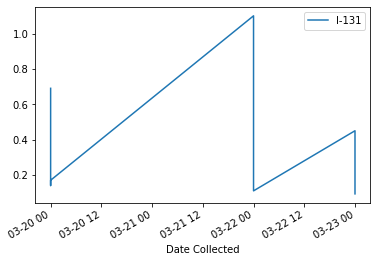

In [28]:
# 3. .Create a plot with a filter per Location, selecting the city of San Bernardino, and one
# radionuclide, with the x-axis set to the date and the y-axis with radionuclide I-131.
filtered = df[df.Location == 'San Bernardino']
filtered.plot(x ='Date Collected', y ='I-131')

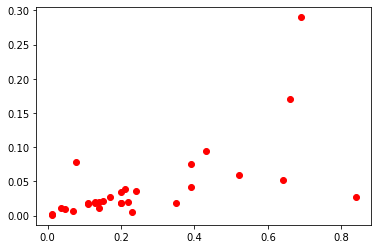

In [30]:
# 4. Create a plot using matplotlib.plt - matlab style - with the concentration of two related
# radionuclides, I-131 and I-132.

plt.plot(df['I-131'],df['I-132'],'ro' )

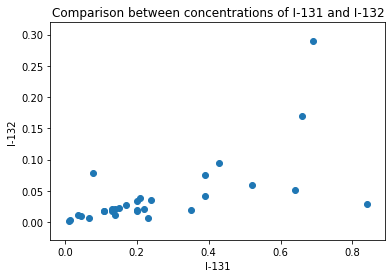

In [31]:
# 5. Create a scatter plot with the concentration of two related radionuclides, I-131 and I-132:
    
ig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
xlabel='I-131',
ylabel='I-132',
title='Comparison between concentrations of I-131 and I-132'
)